<a href="https://colab.research.google.com/github/caroldaza/DM_CyT/blob/main/EEG_microstates_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# We'll need to update our path to import from Drive.
import sys
sys.path.append('/content/drive/MyDrive/procesados')

## Importa paquetes



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
import matplotlib.gridspec as gridspec
from scipy.signal import butter, lfilter
from sklearn import decomposition


Bajo paquete para trabajar con EEG- Me permite ver la topografía

In [4]:
!pip install mne
import mne

     |████████████████████████████████| 6.9 MB 8.2 MB/s 


## (1) Levanto datos de EEG

El registro de EEG de 30 canales viene en formato txt. La frecuencia de muestreo es de 128 Hz.

In [5]:
filename = '/content/drive/MyDrive/procesados/suj_8_bl_1.txt'
datos = pd.read_csv(filename, sep=',', header=None)
EEGdata_0 = datos.to_numpy()
srate=128
ch    = EEGdata_0.shape[0]
samples = EEGdata_0.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEGdata_0.shape[1], EEGdata_0.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


In [6]:
# Montage 10-20
mont1020 = mne.channels.make_standard_montage('standard_1020')
# Elijo canales que tengo
kept_channels = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 
                 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'FC1', 'FC2',
                 'FC5', 'FC6','CP1','CP2','CP5','CP6','AFz','Fpz','POz']

ind = [i for (i, channel) in enumerate(mont1020.ch_names) if channel in kept_channels]
mont1020_30 = mont1020.copy()
# Me quedo solo con los canales seleccionados
mont1020_30.ch_names = [mont1020.ch_names[x] for x in ind]
kept_channel_info = [mont1020.dig[x+3] for x in ind]
# Me quedo con las referencias desde dónde están ubicados los canales
mont1020_30.dig = mont1020.dig[0:3]+kept_channel_info
info_eeg = mne.create_info(ch_names=mont1020_30.ch_names, sfreq=128,
                            ch_types='eeg').set_montage(mont1020_30)

# (2) Inspección de los datos

Los datos ya vienen limpios y filtrados entre 2 y 20 Hz

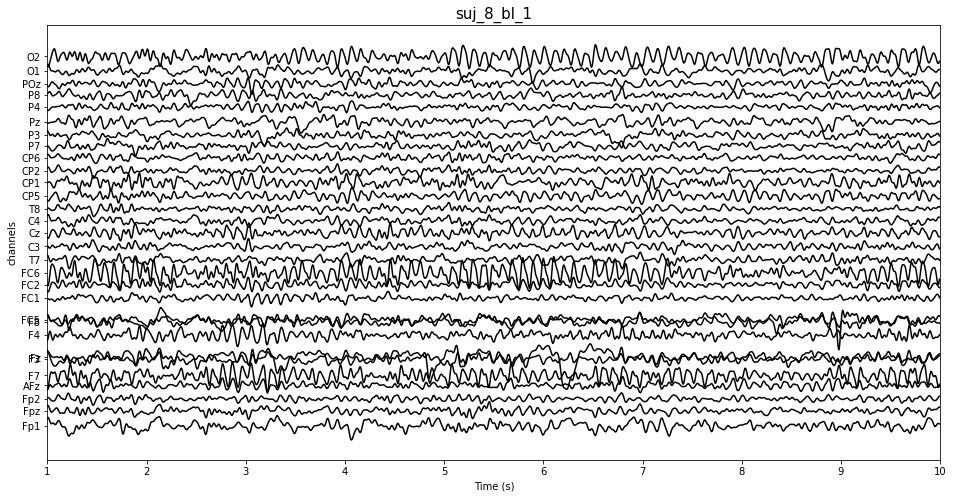

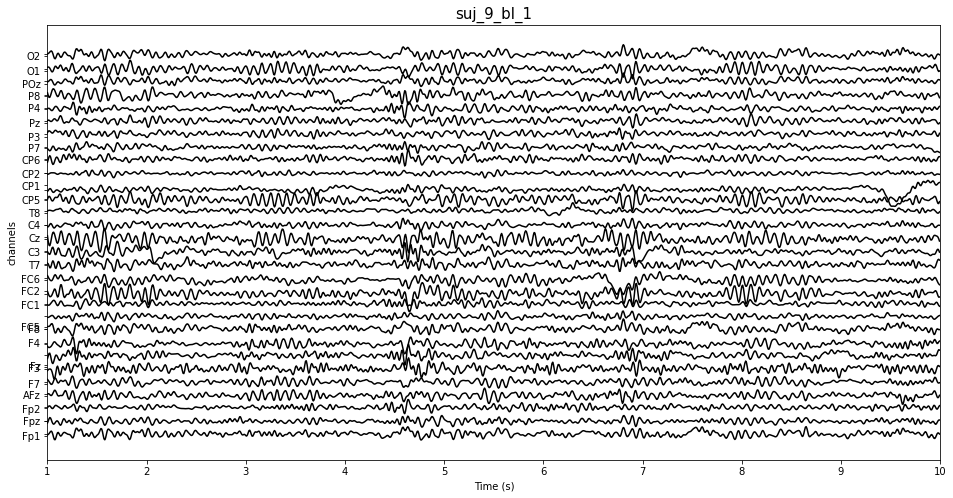

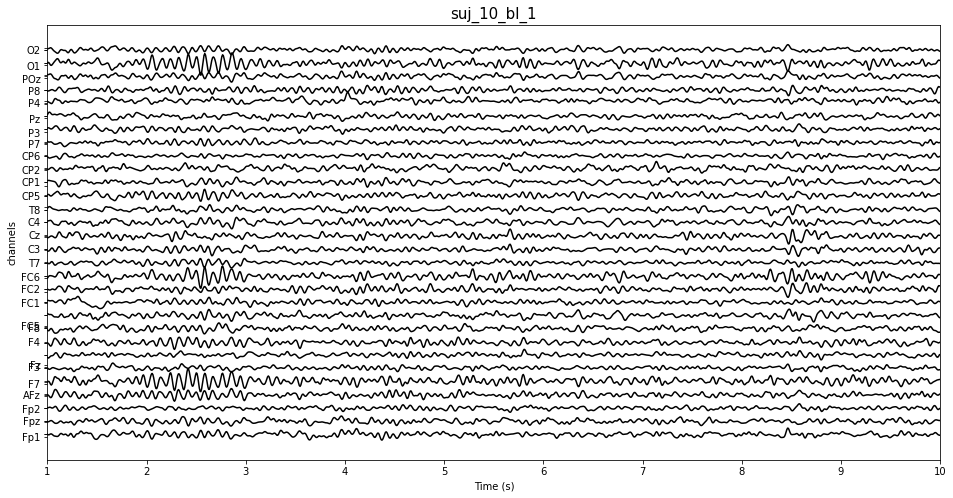

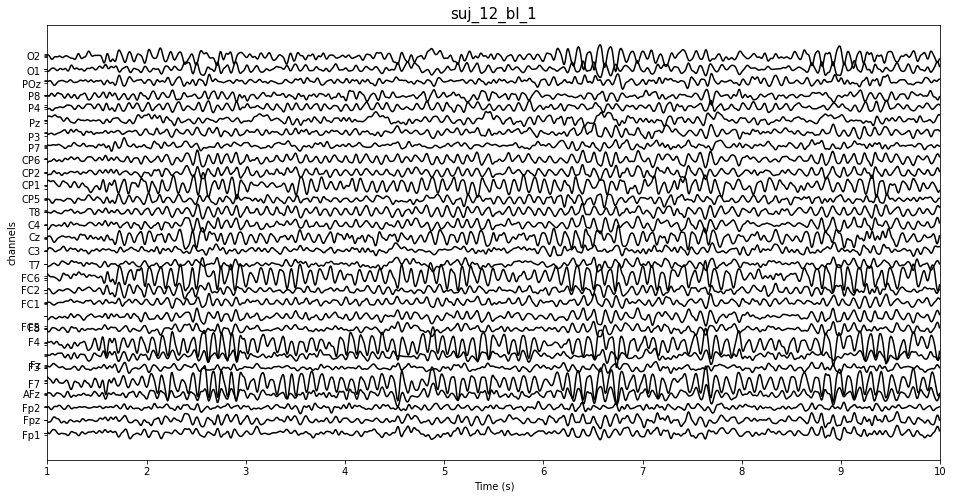

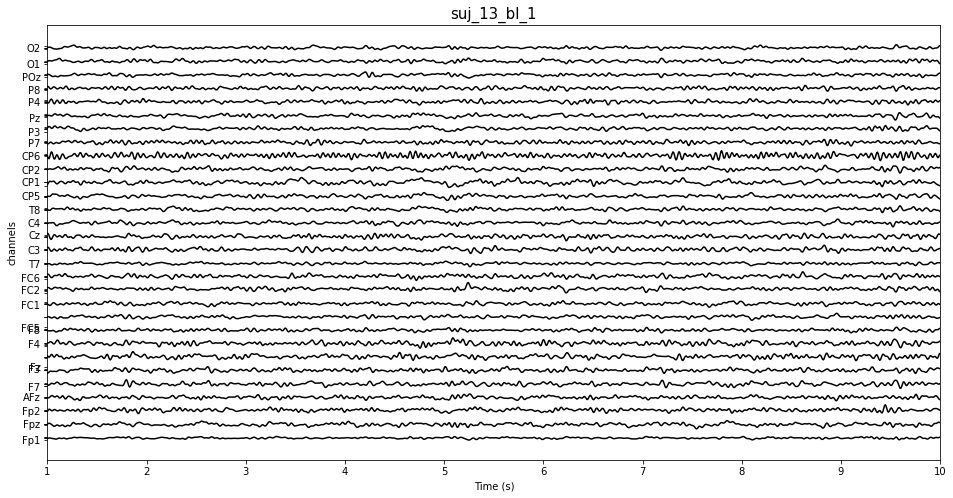

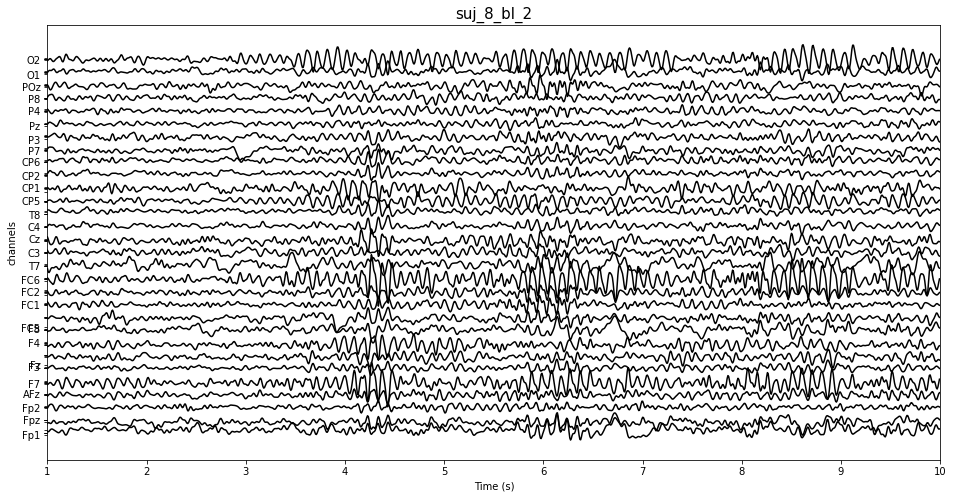

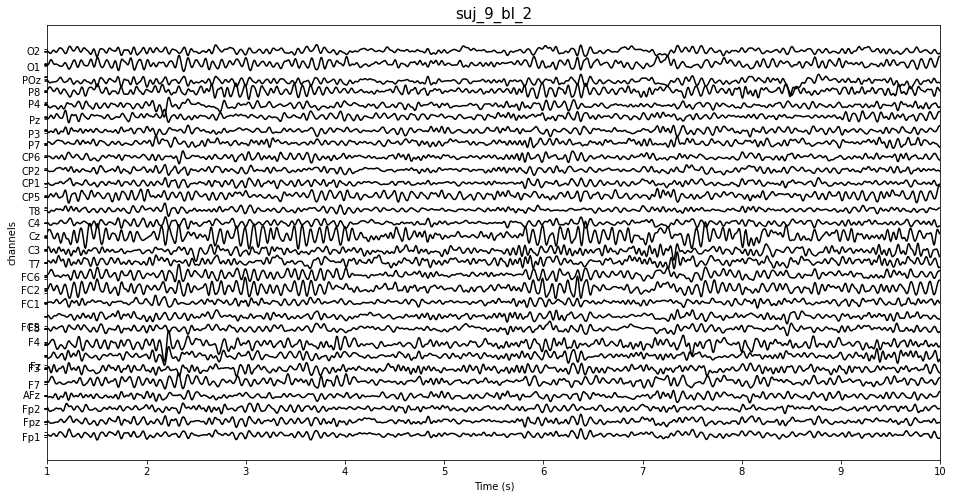

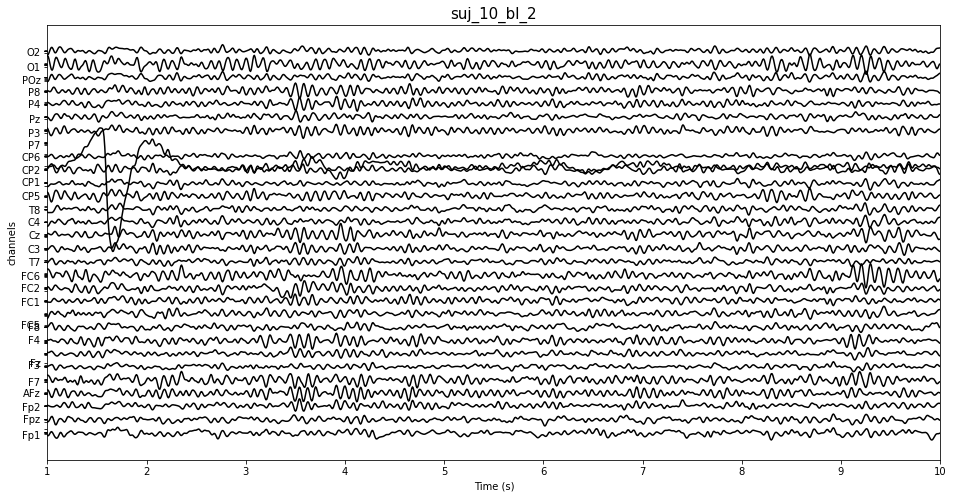

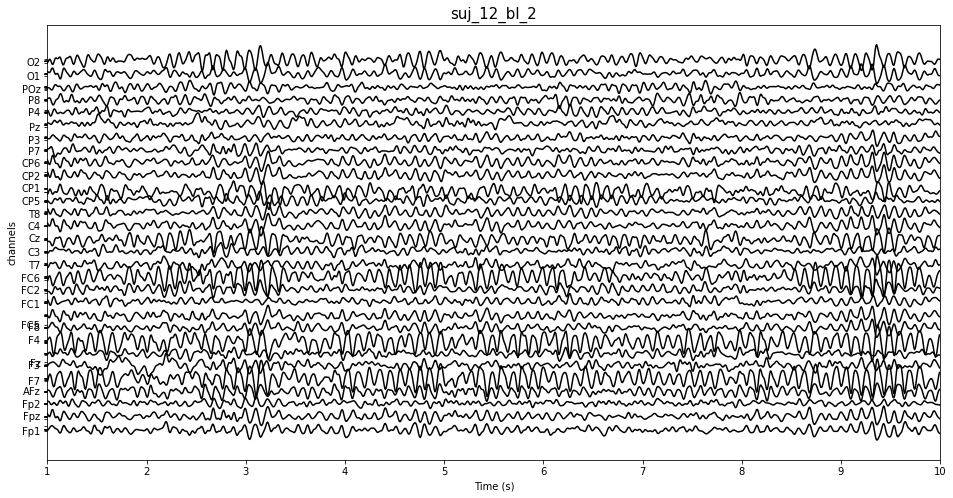

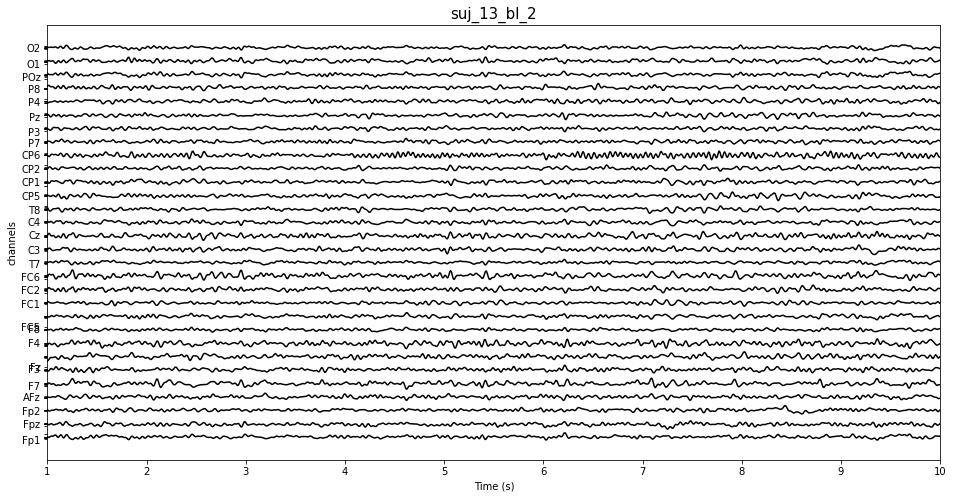

In [7]:
subject = [8,9,10,12,13] 
periodo = [1,2]
srate=128

inicio = 1
fin    = 10
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
yticks=[]

for per in range(1,3):
  for ind,sub in enumerate(subject):
    filename = '/content/drive/MyDrive/procesados/suj_' + str(sub) + '_bl_' + str(per) + '.txt'

    datos = pd.read_csv(filename, sep=',', header=None)
    EEGdata = datos.to_numpy()
    ch    = EEGdata.shape[0]
    samples = EEGdata.shape[1] 

    
    fig,ax = plt.subplots(ncols=1,figsize=(16,8))
    
    for c in np.arange(ch):
        temp = EEGdata[c,inicio*srate:fin*srate]
        dmin=np.min(temp)
        dmax=np.max(temp)
        vmedio = np.mean([dmin,dmax])+30*c
        yticks.append(vmedio)
        ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
        
    ax.set_xlim([inicio*srate,fin*srate])
    ax.set_xticks(xticks)
    ax.set_xticklabels(np.arange(inicio,fin+1))
    ax.set_yticks(yticks)
    ax.set_yticklabels(mont1020_30.ch_names)
    ax.set_ylabel('channels')
    ax.set_xlabel('Time (s)')
    name = 'suj_' + str(sub) + '_bl_' + str(per) 
    ax.set_title(name , fontsize=15)
      
    plt.show()




El sujeto 13 parece ser especial

## (3) Topografía media

Topología


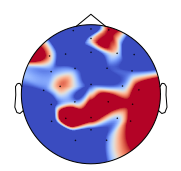

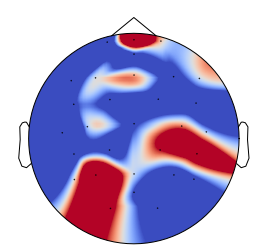

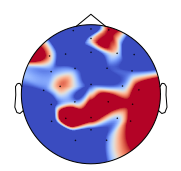

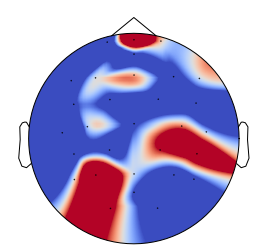

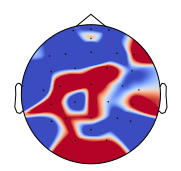

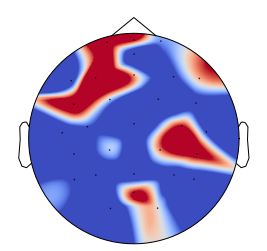

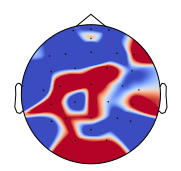

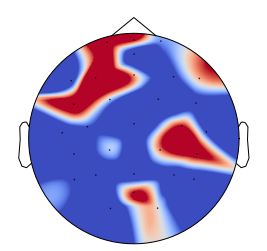

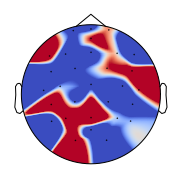

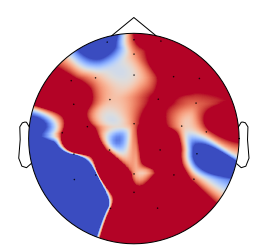

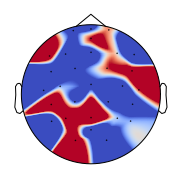

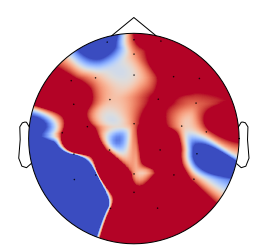

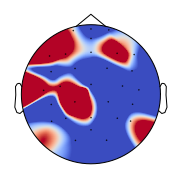

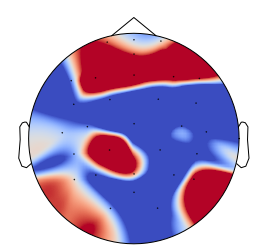

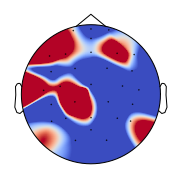

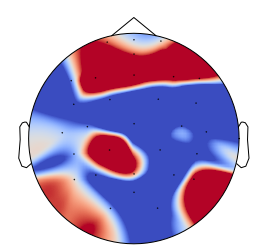

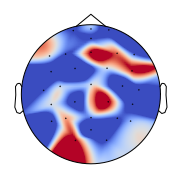

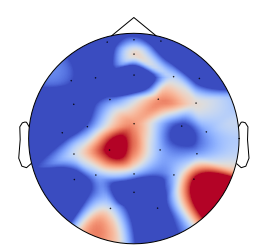

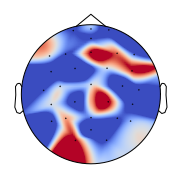

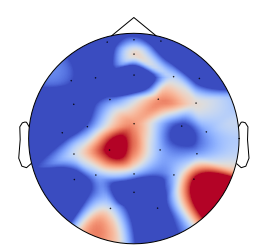

In [16]:
subject = [8,9,10,12,13] 
periodo = [1,2]
srate=128

inicio = 1
fin    = 2

for ind,sub in enumerate(subject):
  for per in range(1,3):
    filename1 = '/content/drive/MyDrive/procesados/suj_' + str(sub) + '_bl_1.txt'
    filename2 = '/content/drive/MyDrive/procesados/suj_' + str(sub) + '_bl_2.txt'

    #print(filename1)
    #print(filename2)

    datos1 = pd.read_csv(filename1, sep=',', header=None)
    datos2 = pd.read_csv(filename2, sep=',', header=None)
    EEGdata1 = datos1.to_numpy()
    EEGdata2 = datos2.to_numpy()
    #ch    = EEGdata.shape[0]
    #samples = EEGdata.shape[1] 


    fig, ax = plt.subplots(figsize=(3, 3),gridspec_kw=dict(top=0.9),sharex=True,sharey=True)

    name = 'suj_' + str(sub) + '_bl_' + str(per) 

    ax,cm1   = mne.viz.plot_topomap(EEGdata1[:,inicio*srate:fin*srate].mean(axis=1),info_eeg,vmin=-0.05,vmax=0.3,
                      cmap='coolwarm', contours=0, show=True)
    ax,cm2   = mne.viz.plot_topomap(EEGdata2[:,inicio*srate:fin*srate].mean(axis=1),info_eeg,vmin=-0.05,vmax=0.3,
                      cmap='coolwarm', contours=0, show=True)
      
  #ax.set_title('topogragía promedio')
  #ax_x_start = 0.95
  #ax_x_width = 0.04
  #ax_y_start = 0.1
  #ax_y_height = 0.9
  #cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
  #clb = fig.colorbar(ax, cax=cbar_ax)
  
  #ax.set_title(name , fontsize=15)    


***HAY QUE CALCULAR AQUI ALGUNA DE LAS MEDIDAS DE DISTANCIA VISTAS EN CLASE PARA COMPARAR LAS CABECITAS***
y hay que revisar la función que dibuja para hacerlas más bonitas

## (3) Descomposición (PCA-1)

Concatenando en tiempo para todos los sujetos:

(30, 3)
(30, 3)
(30, 3)
(30, 3)
(30, 3)


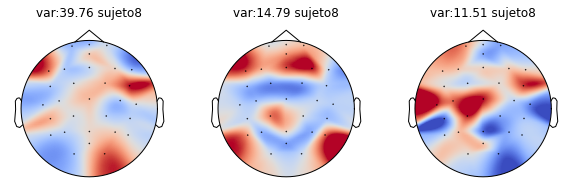

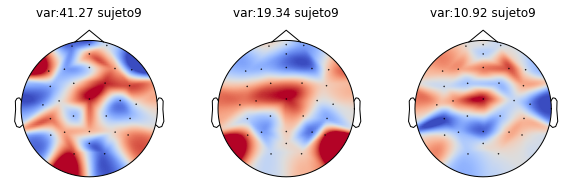

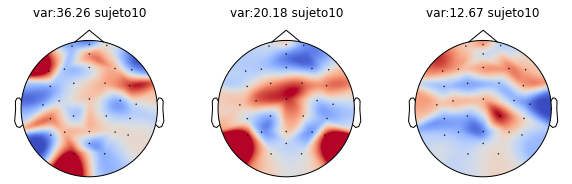

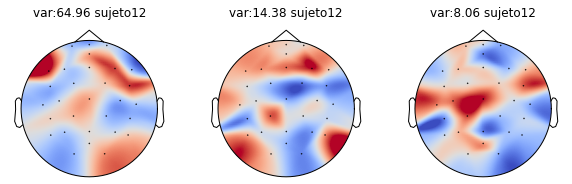

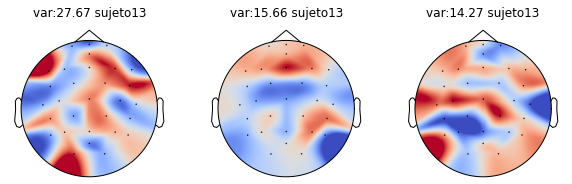

In [9]:
subject = [8,9,10,12,13] 
periodo = [1,2]
srate=128

inicio = 1
fin    = 10
i=0

EEGdata_all = pd.DataFrame()

for ind,sub in enumerate(subject):
  for per in range(1,3):
    
    
    filename = '/content/drive/MyDrive/procesados/suj_' + str(sub) + '_bl_' + str(per) + '.txt'

    datos = pd.read_csv(filename, sep=',', header=None)
    EEGdata = datos.to_numpy()

    globals()['df' + str(i)] = EEGdata # esto crea variables df y les asigna dataframes que va leyendo
    i += 1

# pasar numpy array a dataset
# seguro hay una manera mas inteligente de escribir esto pero para rapidez
df0 = pd.DataFrame(df0) #s8 p1
df1 = pd.DataFrame(df1) #s8 p2
df2 = pd.DataFrame(df2) #s9 p1
df3 = pd.DataFrame(df3) #s9 p2
df4 = pd.DataFrame(df4) #s10 p1
df5 = pd.DataFrame(df5) #s10 p2
df6 = pd.DataFrame(df6) #s12 p1
df7 = pd.DataFrame(df7) #s12 p2
df8 = pd.DataFrame(df8) #s13 p1
df9 = pd.DataFrame(df9) #s13 p2

# Concateno pre y post por sujeto

frames1 = [df0,df1]  
frames2 = [df2,df3]
frames3 = [df4,df5]
frames4 = [df6,df7]
frames5 = [df8,df9]

for i, sub in enumerate(subject):
  EEGdata_all_times = pd.concat(globals()['frames'+str(i+1)],axis=1) #concatenando

  #PCA
  pca = decomposition.PCA(n_components=3)
  pca.fit(EEGdata_all_times)
  pcs = pca.transform(EEGdata_all_times)
  print(pcs.shape)
  var = pca.explained_variance_ratio_
  fig2, ax = plt.subplots(ncols=pcs.shape[1], figsize=(10, 3), gridspec_kw=dict(top=0.9),
                      sharex=True, sharey=True)

  for p in range(pcs.shape[1]):
    mne.viz.plot_topomap(pcs[:,p],
                      info_eeg,
                      cmap='coolwarm', contours=0,
                      axes=ax[p],show=False)
    ax[p].set_title('var:'+str(round(var[p]*100,2))+' '+'sujeto'+str(sub))  



***AQUI HABRÍA QUE COMPARAR CON UNA MEDIDA DE DISTANCIA TAMBIÉN***

## (4) Cálculo del Global Field Power

In [10]:
#
for i, sub in enumerate(subject):
  EEGdata_all_times = pd.concat(globals()['frames'+str(i+1)],axis=1) #concatenando por columnas

  media = np.mean(EEGdata_all_times, axis=0)  # la media entre los 30 canales
  referenciado_cuad = np.square(EEGdata_all_times.subtract(media, axis=1)) # restando la media de todas las filas y elevando a 2
  globals()['GFP'+ str(sub)] = np.sqrt((1/30)*np.sum(referenciado_cuad, axis=0)) #sqrt(k*sum((ui-mean(u))^2)) suma sobre columnas



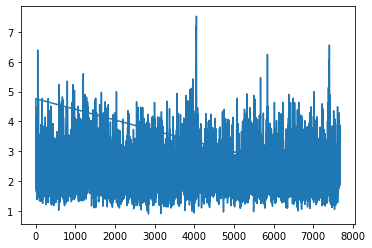

In [11]:
plt.plot(GFP13)

In [12]:
GFP10

0       4.072512
1       4.682868
2       5.190481
3       5.935945
4       6.849898
          ...   
7676    3.580176
7677    4.654494
7678    6.093395
7679    6.515780
7680    5.443500
Length: 15362, dtype: float64

## (5) Calculo de los picos del GFP

In [13]:
from scipy.signal import find_peaks 
subject = [8,9,10,12,13] 
indices_peaks = []

# indices de los picos para cada GFP
for ind,sub in enumerate(subject):
  y = globals()['GFP' + str(sub)]
  picos = find_peaks(y, height=0)
  indices_peaks.append(picos[0])


In [14]:
indices_peaks

[array([    2,     7,    16, ..., 15341, 15348, 15356]),
 array([    1,     9,    14, ..., 15348, 15352, 15359]),
 array([    5,    10,    17, ..., 15344, 15351, 15360]),
 array([    3,     8,    15, ..., 15344, 15351, 15357]),
 array([    6,    11,    18, ..., 15342, 15351, 15357])]

In [37]:
len(indices_peaks[4])

2763

In [32]:
EEGdata_all_times.iat[1,5]

1.266

In [54]:
EEGdata_all_times_matrix = EEGdata_all_times.to_numpy()
EEGdata_all_times_matrix[1,5]

1.266

In [56]:
len(EEGdata_all_times_matrix[:,indices_peaks[4]]), len(EEGdata_all_times_matrix[:,indices_peaks[4]][0])

(30, 2763)

In [57]:
# Aqui se recuperan para cada sujeto una matriz cuyas columnas son el EEG en cada punto del GDP

for i, sub in enumerate(subject):
  EEGdata_all_times = pd.concat(globals()['frames'+str(i+1)],axis=1) #concatenando por columnas

  EEGdata_all_times_matrix = EEGdata_all_times.to_numpy() # lo paso a matriz para accederlo mas facil
  globals()['EEG_GFP_vectors_' + str(sub)] = EEGdata_all_times_matrix[:,indices_peaks[i]]


In [58]:
EEG_GFP_vectors_13 # los vectores a clusterizar son las columnas de estas matrices

array([[ 0.44567,  0.89402,  0.48766, ..., -1.6615 ,  2.4908 ,  2.3982 ],
       [ 2.1799 ,  5.7739 , -3.5536 , ..., -2.0772 ,  2.9709 ,  2.3654 ],
       [ 5.0301 ,  1.4424 , -2.6422 , ..., -1.1081 ,  1.6215 ,  0.46011],
       ...,
       [ 0.1804 ,  1.7349 , -2.8029 , ..., -2.4303 ,  3.9204 ,  0.69678],
       [-2.1131 , -2.4785 ,  1.6716 , ..., -1.4188 ,  0.97903, -5.9976 ],
       [ 0.49955,  0.74695, -1.9537 , ..., -1.2481 ,  1.1826 ,  2.647  ]])

In [62]:
EEG_GFP_vectors13.shape[0], EEG_GFP_vectors13.shape[1]
# 30 canales, 2763 puntos para sujeto 13

(30, 2763)